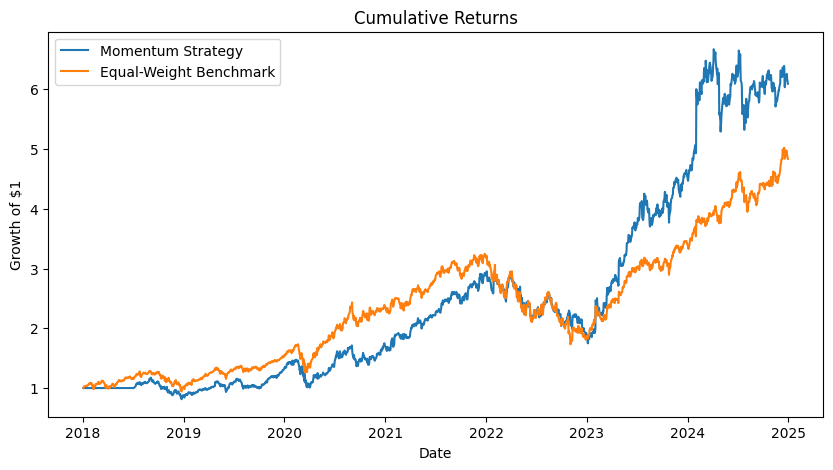

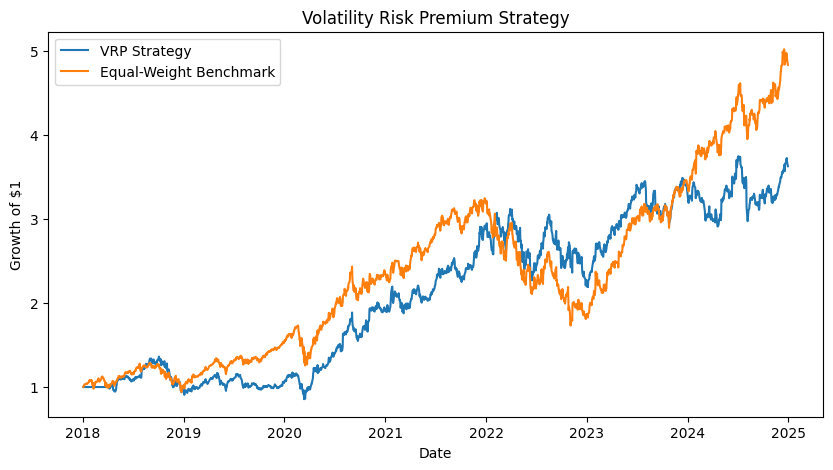

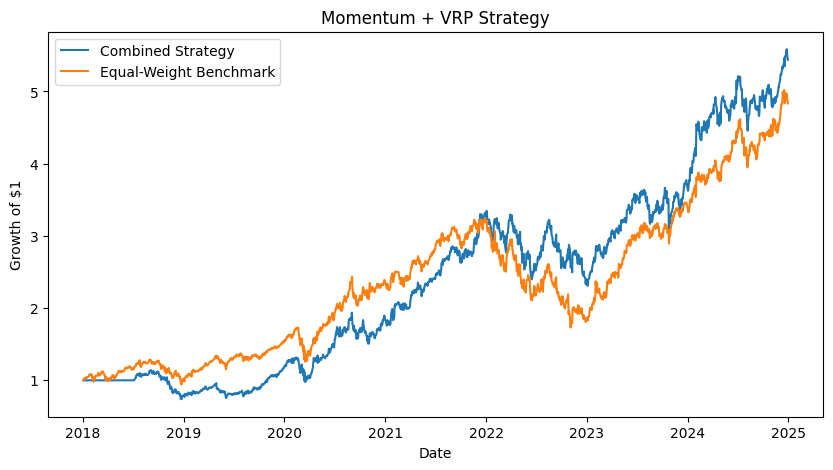

In [3]:
import sys, os
import pandas as pd
import matplotlib.pyplot as plt


# Add the root directory (parent of notebooks/) to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), "..")) #os.getcwd() returns current working directory, ".." goes one level up

if project_root not in sys.path:

    # Look for modules in project_root
    sys.path.insert(0, project_root)

from src.portfolio import top_n_percent_signal, build_portfolio

# Load momentum, price and VRP data
momentum   = pd.read_csv("../data/processed/momentum.csv", index_col = 0, parse_dates = True)
vrp        = pd.read_csv("../data/processed/volatility_risk_premium.csv", index_col = 0, parse_dates = True)
prices     = pd.read_csv("../data/processed/price_data.csv", index_col = 0, parse_dates = True)
momntm_vrp = pd.read_csv("../data/processed/momntm_vrp_combined.csv", index_col = 0, parse_dates = True)

# Calculate daily returns
returns = prices.pct_change().fillna(0)

# Create signals
signal          = top_n_percent_signal(momentum, pct = 0.2) #pct is the ratio of top stocks you want to keep (pct = 0.2 corresponds to top 20%) based on the ranking (momentum in this case)
signal_vrp      = top_n_percent_signal(vrp, pct = 0.2)
signal_combined = top_n_percent_signal(momntm_vrp, pct = 0.2) 

# Run backtest
portfolio_returns         = build_portfolio(returns, signal)
vrp_strategy_returns      = build_portfolio(returns, signal_vrp)
combined_strategy_returns = build_portfolio(returns, signal_combined)

cumulative = (1 + portfolio_returns).cumprod()
cumulative_vrp = (1 + vrp_strategy_returns).cumprod()
cumulative_combined = (1 + combined_strategy_returns).cumprod()
benchmark  = (1 + returns.mean(axis = 1)).cumprod()

# Plot results
plt.figure(figsize = (10, 5))
plt.plot(cumulative, label = "Momentum Strategy")
plt.plot(benchmark, label = "Equal-Weight Benchmark")
plt.title("Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Growth of $1")
plt.legend()
plt.show()


plt.figure(figsize = (10, 5))
plt.plot(cumulative_vrp, label = "VRP Strategy")
plt.plot(benchmark, label = "Equal-Weight Benchmark")
plt.title("Volatility Risk Premium Strategy")
plt.xlabel("Date")
plt.ylabel("Growth of $1")
plt.legend()
plt.show()


plt.figure(figsize = (10, 5))
plt.plot(cumulative_combined, label = "Combined Strategy")
plt.plot(benchmark, label = "Equal-Weight Benchmark")
plt.title("Momentum + VRP Strategy")
plt.xlabel("Date")
plt.ylabel("Growth of $1")
plt.legend()
plt.show()